1. 经典机器学习算法

这些算法通常涉及数据处理、特征工程、模型实现以及超参数调优。

	•	线性回归 (Linear Regression)：涉及梯度下降（gradient descent）、正规方程（normal equation）、L1/L2 正则化（Lasso/Ridge）。
	•	逻辑回归 (Logistic Regression)：二分类、多分类问题，交叉熵损失函数，梯度计算。
	•	支持向量机 (SVM)：使用核函数、软/硬间隔、最大间隔分类器。
	•	决策树 (Decision Tree) & 随机森林 (Random Forest)：信息增益、基尼系数、剪枝、特征重要性分析。
	•	K-近邻 (KNN)：计算欧几里得距离、K值选择、KD树优化。
	•	K-Means 聚类：K值选择（肘部法则）、初始化方法（KMeans++）。
	•	贝叶斯分类器 (Naive Bayes)：概率计算、拉普拉斯平滑。

2. 深度学习基础

面试可能要求手写神经网络的前向传播和反向传播，或使用框架（如 TensorFlow/PyTorch）实现简单模型。

	•	全连接神经网络 (DNN)：前向传播（矩阵运算）、反向传播（链式法则）。
	•	卷积神经网络 (CNN)：卷积、池化、批量归一化（BatchNorm）。
	•	循环神经网络 (RNN) & LSTM/GRU：时间序列建模、梯度消失/爆炸问题。
	•	Transformer & 自注意力机制（如果涉及NLP方向）。
	•	Autoencoder & 变分自编码器 (VAE)：降维与生成模型。

3. 机器学习优化


	•	梯度下降（GD、SGD、Momentum、Adam）：优化方法的区别与适用场景。
	•	超参数调优（Grid Search、Random Search、Bayesian Optimization）。
	•	过拟合与正则化（Dropout、L1/L2、Early Stopping）。


4. 机器学习工程实践

MLE 面试不仅考察算法实现，也涉及工程优化，如：

	•	并行计算（Mini-batch training, Multiprocessing）。
	•	数据预处理（Pandas, NumPy）。
	•	高效读取大规模数据（DataLoader, TFRecord）。

5. 可能的Coding题型

面试可能要求你：

	•	手写一个算法（如线性回归、K-Means）。
	•	实现一个特定功能的模型（如手写一个两层神经网络）。
	•	优化已有代码（提高速度、减少内存）。
	•	调试 Bug（给出错误代码，找出并修正）。

# Traditional ML algorithms

## Linear Regression

**loss function:** MSE(mean square error)


**2 ways to optimize the loss function:** Normal equation and Gradient descent



---


(1) When the data size is huge, we cannot use the normal equation method, why?

	•	multicolinearity and redundant features -> singular matrix
	•	high condition number
	•	floating point precision


---



(2) the time complexity of inverting a matrix: o(n^3)

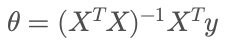

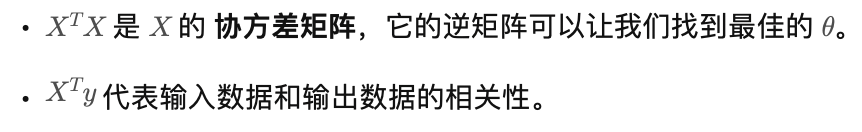

**Gradient:**

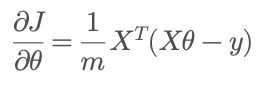

m is the sample size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearRegression:
  def __init__(self, mode = 'normal', learning_rate = 0.01, epoch = 10000):
    self.mode = mode
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.theta = None

  def fit(self, X, y):
    m, n = X.shape
    X = np.c_[np.ones(m), X]
    if self.mode == 'normal':
      self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    elif self.mode == 'gradient':
      self.theta = np.random.randn(n + 1, 1)
      for _ in range(self.epoch):
        gradient = (1 / m) * X.T.dot(X.dot(self.theta) - y)
        self.theta -= self.learning_rate * gradient
    else:
      print("Wrong Mode!")

  def predict(self, X):
    X = np.c_[np.ones(X.shape[0]), X]
    return X.dot(self.theta)

# Example: y = 5X1 + 4X2 + 3X3 + 2
true_theta = np.array([[2], [3], [4], [5]])
np.random.seed(42)
X = np.random.randn(100, 3)
y = np.ones((100, 1)).dot(true_theta[:1]) + X.dot(true_theta[1:]) + np.random.randn(100, 1)

print(f'This is the ground truth: {true_theta.ravel()}')

model_ne = LinearRegression()
model_ne.fit(X,y)
y_pred_ne = model_ne.predict(X)
print(f"This is the parameters for normal equation: {model_ne.theta.ravel()}")

model_gd = LinearRegression(mode = 'gradient', epoch = 100)
model_gd.fit(X, y)
y_pred_gd = model_gd.predict(X)
print(f"This is the parameters for gradient descent(epoch = 100): {model_gd.theta.ravel()}")

model_gd2 = LinearRegression(mode = 'gradient', epoch = 1000)
model_gd2.fit(X, y)
y_pred_gd2 = model_gd2.predict(X)
print(f"This is the parameters for gradient descent(epoch = 1000): {model_gd2.theta.ravel()}")


This is the ground truth: [2 3 4 5]
This is the parameters for normal equation: [2.11286229 2.92233671 3.95003645 4.89240669]
This is the parameters for gradient descent(epoch = 100): [0.70956264 0.97020277 1.87535239 3.19869871]
This is the parameters for gradient descent(epoch = 1000): [2.11290886 2.91658994 3.94770362 4.89074374]


## Logistic Regression

### 2 categories

Sigmoid function

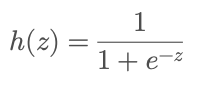

loss function

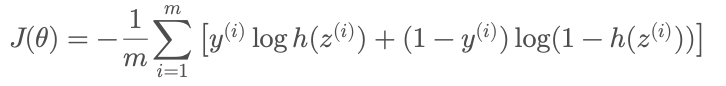

(1) we cannot use MSE, why?

	•	The sigmoid function is not linear, which causes the MSE lost function is non-convex.
	•	So we need to use cross entropy loss

(2) we cannot optimize the loss function directly, why?

	•	The sigmoid function is not linear.

In [18]:
import numpy as np

class LogisticRegression:
  def __init__(self, learning_rate = 0.01, epoch = 1000):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.theta = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def loss(self, h, y):
    m = len(y)
    return - 1 / m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

  def fit(self, X, y):
    m, n = X.shape
    X = np.c_[np.ones(m), X]
    y = y.reshape(-1, 1)
    self.theta = np.random.randn(n + 1, 1)

    for epoch in range(self.epoch):
      z = X.dot(self.theta)
      h = self.sigmoid(z)
      gradient = (1 / m) * X.T.dot(h - y)
      self.theta -= self.learning_rate * gradient
      if epoch % 1000 == 0:
        loss = self.loss(h, y)
        print(f"epoch {epoch}, the loss is: {loss}")

  def predict_prob(self, X):
    m, n = X.shape
    X = np.c_[np.ones(m), X]
    return self.sigmoid(X.dot(self.theta))

  def predict_label(self, X, threshold = 0.5):
    return (self.predict_prob(X) >= threshold).astype(int)

# Example: y = 4X1 + 3X2 + 2

np.random.seed(42)
m, n = 500, 2 # m is the sample size, n is the number of features
X = np.random.randn(m, n)
true_theta = [[2], [4], [3]]
y = (np.ones((m, 1)) @ true_theta[:1] + X @ true_theta[1:] + np.random.rand(m, 1)) > 0
y = y.astype(int)

train_X, train_y = X[:400], y[:400]
test_X, test_y = X[400:], y[400:]
model_lg = LogisticRegression(epoch = 10000)
model_lg.fit(train_X, train_y)
print(model_lg.theta)

y_pred = model_lg.predict_label(test_X)
accuracy = np.mean(y_pred.flatten() == test_y.flatten())
print(f"This is the prediction accuracy {accuracy}")




epoch 0, the loss is: 1.187197690243519
epoch 1000, the loss is: 0.32843419990500905
epoch 2000, the loss is: 0.24960048641394458
epoch 3000, the loss is: 0.21578435431814377
epoch 4000, the loss is: 0.19550881939118042
epoch 5000, the loss is: 0.18151396879584378
epoch 6000, the loss is: 0.17105531311923586
epoch 7000, the loss is: 0.1628277948143934
epoch 8000, the loss is: 0.15611890504947287
epoch 9000, the loss is: 0.15050136464867683
[[2.284761  ]
 [3.75736202]
 [2.86660053]]
This is the prediction accuracy 0.98


### multi categories-soft max

### multi categories-OvR

## SVM

**Goal:** to find a optimal hyperplane to maximize the margin between 2 categories AND minimize the loss function

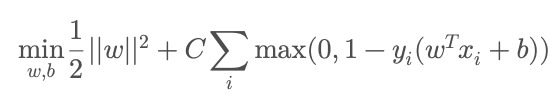

**Loss Function:** Hinge Loss

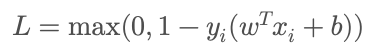




The margin is 1/||w||. And we try to maximize it.

However, the margin is non-convex. It's hard to do the non-convex optimization, so we convert the problem to *minimize ||w||^2*, which is convex.

**gradient:**

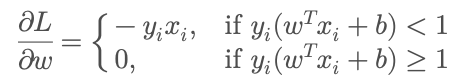



1.   SGD (Stochastic Gradient Descent)
2.   BGD (Batch Gradient Descent)
3.   Mini-Batch Gradient Descent


SGD天然适用于非光滑优化问题？？


In [24]:
import numpy as np

class SVM:
  def __init__(self, learning_rate = 0.01, epoch = 1000, C = 1.0):
    self.learning_rate = learning_rate
    self.epoch = epoch
    self.C = C
    self.w = None
    self.b = None

  def hinge_loss(self, X, y):
    loss = np.maximum(0, 1 - y * (X @ self.w + self.b))
    return 0.5 * self.w.T @ self.w + self.C * np.sum(loss)

  def fit(self, X, y):
    m, n = X.shape
    y = np.where(y <= 0, -1, 1)
    self.w = np.zeros(n)
    self.b = 0

    for epoch in range(self.epoch):
      for i in range(m):
        condition = y[i] * (X[i] @ self.w + self.b) >= 1
        # X_i = X[i].reshape(-1, 1)
        if condition:
          self.w -= self.learning_rate * (2 * self.w)
        else:
          self.w -= self.learning_rate * (2 * self.w - self.C * y[i] * X[i])
          self.b -= self.learning_rate * (-self.C * y[i])

      if epoch % 100 == 0:
        loss = self.hinge_loss(X, y)
        print(f"Epoch {epoch}, Loss: {loss}, w: {self.w.flatten()}, b: {self.b}")

  def predict(self, X):
      return np.sign(X @ self.w + self.b).flatten()

# 生成模拟数据
np.random.seed(42)
m, n = 500, 2
X = np.random.randn(m, n)
y = (X[:, 0] * 4 + X[:, 1] * 3 + 2 > 0).astype(int)  # 线性可分数据
y = np.where(y == 0, -1, 1)  # 将 0/1 转换为 -1/1

# 划分训练集和测试集
train_X, train_y = X[:400], y[:400]
test_X, test_y = X[400:], y[400:]

# 训练 SVM
svm = SVM(learning_rate=0.001, C=1.0, epoch=1000)
svm.fit(train_X, train_y)

# 测试 SVM
y_pred = svm.predict(test_X)
accuracy = np.mean(y_pred == test_y)
print(f"Test Accuracy: {accuracy}")

Epoch 0, Loss: 333.81670714596606, w: [0.15675799 0.11389141], b: 0.10600000000000008
Epoch 100, Loss: 263.4911018600349, w: [0.15891785 0.11409939], b: 0.8900000000000007
Epoch 200, Loss: 263.52693548894854, w: [0.15816688 0.11489875], b: 0.8900000000000007
Epoch 300, Loss: 263.6176120862418, w: [0.15811638 0.11383277], b: 0.8890000000000007
Epoch 400, Loss: 263.4911018600349, w: [0.15891785 0.11409939], b: 0.8900000000000007
Epoch 500, Loss: 263.52693548894854, w: [0.15816688 0.11489875], b: 0.8900000000000007
Epoch 600, Loss: 263.6176120862418, w: [0.15811638 0.11383277], b: 0.8890000000000007
Epoch 700, Loss: 263.4911018600349, w: [0.15891785 0.11409939], b: 0.8900000000000007
Epoch 800, Loss: 263.52693548894854, w: [0.15816688 0.11489875], b: 0.8900000000000007
Epoch 900, Loss: 263.6176120862418, w: [0.15811638 0.11383277], b: 0.8890000000000007
Test Accuracy: 0.75


## Decision Tree

**When to stop:**

	•	max depth
	•	min sample size
	•	Gini impurity / Entropy gain threshold

In [12]:
import numpy as np
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None):
        """
        初始化决策树
        :param max_depth: 树的最大深度（默认无限制）
        """
        self.max_depth = max_depth
        self.tree = None  # 存储树的结构

    def entropy(self, y):
        """计算数据集的熵"""
        counts = np.bincount(y)  # 计算每个类别的样本数
        probabilities = counts / len(y)  # 计算类别概率
        return -np.sum([p * np.log2(p) for p in probabilities if p > 0])  # 避免 log(0)

    def information_gain(self, X_column, y, threshold):
        """计算某个特征的特定分裂点的信息增益"""
        left_mask = X_column <= threshold
        right_mask = X_column > threshold
        left_y, right_y = y[left_mask], y[right_mask]

        # 计算信息增益
        H_before = self.entropy(y)
        H_after = (len(left_y) / len(y)) * self.entropy(left_y) + (len(right_y) / len(y)) * self.entropy(right_y)
        return H_before - H_after

    def best_split(self, X, y):
        """找到最佳特征和最佳分裂点"""
        best_gain = 0
        best_feature = None
        best_threshold = None
        m, n = X.shape

        for feature in range(n):  # 遍历所有特征
            thresholds = np.unique(X[:, feature])  # 遍历所有可能的划分点
            for threshold in thresholds:
                gain = self.information_gain(X[:, feature], y, threshold)
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def build_tree(self, X, y, depth=0):
        """递归构建决策树"""
        num_samples, num_features = X.shape
        num_classes = len(set(y))

        # 终止条件
        if num_classes == 1 or num_samples < 2 or (self.max_depth and depth >= self.max_depth):
            return Counter(y).most_common(1)[0][0]  # 返回最多的类别

        # 选择最佳分裂
        best_feature, best_threshold = self.best_split(X, y)
        if best_feature is None:
            return Counter(y).most_common(1)[0][0]

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = X[:, best_feature] > best_threshold
        left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
        right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

        return {"feature": best_feature, "threshold": best_threshold, "left": left_subtree, "right": right_subtree}

    def fit(self, X, y):
        """训练决策树"""
        self.tree = self.build_tree(X, y)

    def predict_one(self, x, tree):
        """单个样本预测"""
        if isinstance(tree, dict):
            feature, threshold = tree["feature"], tree["threshold"]
            if x[feature] <= threshold:
                return self.predict_one(x, tree["left"])
            else:
                return self.predict_one(x, tree["right"])
        else:
            return tree

    def predict(self, X):
        """批量预测"""
        return np.array([self.predict_one(x, self.tree) for x in X])

# 生成数据
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 个样本，2 个特征
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # 生成二分类数据

# 划分训练集和测试集
train_X, test_X = X[:80], X[80:]
train_y, test_y = y[:80], y[80:]

# 训练决策树
model_dt = DecisionTree(max_depth=5)
model_dt.fit(train_X, train_y)

# 预测
y_pred = model_dt.predict(test_X)

# 计算准确率
accuracy = np.mean(y_pred == test_y)
print(f"📌 决策树分类准确率: {accuracy:.4f}")

📌 决策树分类准确率: 0.9500


## KNN

**Curse of Dimensionality:**


*   Data sparisity
*   Distances between points become close
*   High computational complexity

Then we can do the dimentionality reduction


---

**Text data:**

Text data usually has high dimentions and we can use cosine similarity



In [6]:
import numpy as np
from collections import Counter

class KNN:
  def __init__(self, k = 3, mode = 'normal'):
    self.k = k
    self.mode = mode
    self.X_train = None
    self.y_train = None

  def fit(self, X, y):
    """
    KNN is a lazy learning algorithm, so the 'fit' function is just storing the data.
    """
    self.X_train = X
    self.y_train = y

  def distance(self, x1, x2):
    if self.mode == 'normal':
      distance = np.sqrt(np.sum((x1 - x2) ** 2))
    elif self.mode == 'text':

      def cosine_sim_pair(x1, x2):
        dot_product = np.dot(x1, x2)
        x1_vector = np.linalg.norm(x1)
        x2_vector = np.linalg.norm(x2)
        return dot_product / (x1_vector * x2_vector)

      def cosine_sim_matrix(X):
        """
        Calculate the cosine sim between every 2 elements in the matrix.
        """
        norms = np.linalg.norm(X, axis = 1, keepdims = True)
        X_normalized = X / norms
        return np.dot(X_normalized, X_normalized.T)

      distance = cosine_sim_pair(x1, x2)
    return distance

  def predict_one(self, x1):
    distances = [self.distance(x, x1) for x in self.X_train]

    k_index = np.argsort(distances)[:self.k]
    k_label = [self.y_train[i] for i in k_index]

    final_label = Counter(k_label).most_common(1)
    return final_label[0][0]

  def predict(self, X):
    """
    return: the array of predicted labels
    """
    return np.array([self.predict_one(x) for x in X])



# 生成数据
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 个样本，2 维特征
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # 根据特征和是否大于 1 进行分类

# 划分训练集和测试集
train_X, test_X = X[:80], X[80:]
train_y, test_y = y[:80], y[80:]

# 训练 KNN
model_knn = KNN(k=3)
model_knn.fit(train_X, train_y)

# 预测
y_pred = model_knn.predict(test_X)

# 计算准确率
accuracy = np.mean(y_pred == test_y)
print(f"\n📌 KNN 分类准确率: {accuracy:.4f}")


📌 KNN 分类准确率: 0.9500


## K-means

Elbow method:
To find the best k

Silhouette Score
轮廓系数，衡量聚类效果

[203 266 152]
[[ 1.93237957 -3.14237949]
 [ 2.9339202  -4.2110162 ]
 [-3.02090159 -2.88267262]]


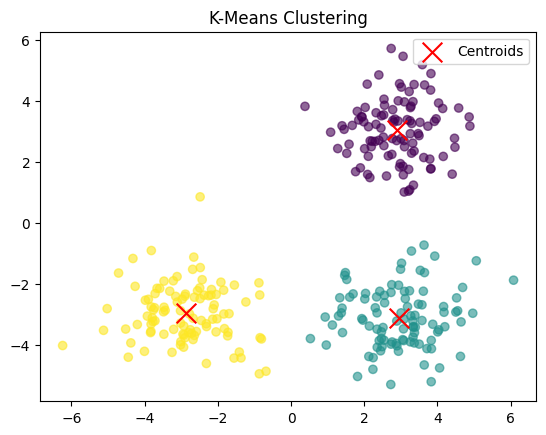

In [7]:
import numpy as np

class Kmeans:
  def __init__(self, k = 3, max_iteration = 100, tol = 1e-4):
    self.k = k
    self.max_iteration = max_iteration
    self.tol = tol
    self.centroids = None

  def fit(self, X):
    m, n = X.shape
    np.random.seed(42)

    # choose self.k centroids from m samples, and they should not be the same
    initial_centroids = np.random.choice(m, self.k, replace=False)
    self.centroids = X[initial_centroids]

    for iter in range(self.max_iteration):
      # add one more dimension to X so that it can do the math with self.centroids
      distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis = 2)
      labels = np.argmin(distances, axis = 1)

      for i in self.k:
        new_centroids = np.array(X[labels == i].mean(axis = 0))

      if np.linalg.norm(self.centroids - new_centroids) <= self.tol:
        break

      self.centroids = new_centroids

  def predict(self, X):
    """
    After we've already got the final centroids, we can assign labels to new data by calculating the distance.
    """
    distance = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis = 2)
    return np.argmin(distance, axis = 1)

import matplotlib.pyplot as plt

# 生成数据
np.random.seed(42)
X1 = np.random.randn(100, 2) + np.array([3, 3])
X2 = np.random.randn(100, 2) + np.array([-3, -3])
X3 = np.random.randn(100, 2) + np.array([3, -3])
X = np.vstack([X1, X2, X3])  # 合并数据

# 训练 K-Means
kmeans = KMeans(k=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='x', s=200, label="Centroids")
plt.legend()
plt.title("K-Means Clustering")
plt.show()

## Naive Bayes

## PCA

# Database

## Vector database

In [ ]:
import faiss
import numpy as np
import pickle

class VectorDatabase:
    def __init__(self, dimension, index_type="FlatL2"):
        """
        初始化向量数据库
        :param dimension: 向量的维度
        :param index_type: 索引类型，如 FlatL2（精确搜索）或 HNSW（近似搜索）
        """
        self.dimension = dimension
        if index_type == "FlatL2":
            self.index = faiss.IndexFlatL2(dimension)  # 使用 L2 距离
        elif index_type == "HNSW":
            self.index = faiss.IndexHNSWFlat(dimension, 32)  # HNSW 近似最近邻搜索
        else:
            raise ValueError("Unsupported index type")

        self.id_map = {}  # 记录 ID -> 向量索引映射
        self.next_id = 0  # 分配唯一 ID

    def add_vectors(self, vectors):
        """
        添加向量到数据库
        :param vectors: 一个 numpy 数组，每一行是一个向量
        :return: 分配的 ID 列表
        """
        num_vectors = vectors.shape[0]
        ids = np.arange(self.next_id, self.next_id + num_vectors)
        self.index.add(vectors)

        for i, vector_id in enumerate(ids):
            self.id_map[vector_id] = i  # 存储 ID 映射
        self.next_id += num_vectors
        return ids

    def search(self, query_vector, k=5):
        """
        进行向量搜索
        :param query_vector: 查询向量
        :param k: 返回前 k 个最近邻
        :return: (距离, 近邻 ID)
        """
        distances, indices = self.index.search(query_vector, k)
        ids = [list(self.id_map.keys())[i] for i in indices[0]]
        return distances[0], ids

    def save(self, path="vector_db.pkl"):
        """
        保存数据库到磁盘
        """
        with open(path, "wb") as f:
            pickle.dump((self.index, self.id_map, self.next_id), f)

    def load(self, path="vector_db.pkl"):
        """
        从磁盘加载数据库
        """
        with open(path, "rb") as f:
            self.index, self.id_map, self.next_id = pickle.load(f)

# 创建数据库（128 维向量）
vector_db = VectorDatabase(dimension=128)

# 生成随机向量数据
num_vectors = 1000
data = np.random.random((num_vectors, 128)).astype('float32')

# 添加向量
ids = vector_db.add_vectors(data)

# 查询一个新的向量
query = np.random.random((1, 128)).astype('float32')
distances, nearest_ids = vector_db.search(query, k=5)

print(f"查询最近邻 ID: {nearest_ids}")
print(f"对应的距离: {distances}")

# 保存 & 加载数据库
vector_db.save()
vector_db.load()